In [1]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  dt = {}
  for d in parse(path):
    dt[i] = d
    i += 1
  return pd.DataFrame.from_dict(dt, orient='index')

dt = getDF('meta_Movies_and_TV.json.gz')


In [2]:
df = dt
df.head()

,asin,categories,description,title,price,salesRank,imUrl,related,brand
0,0000143561,"[[Movies & TV, Movies]]","3Pack DVD set - Italian Classics, Parties and ...","Everyday Italian (with Giada de Laurentiis), V...",12.99,{'Movies & TV': 376041},http://g-ecx.images-amazon.com/images/G/01/x-s...,"{'also_viewed': ['B0036FO6SI', 'B000KL8ODE', '...",NaN
1,0000589012,"[[Movies & TV, Movies]]",NaN,Why Don't They Just Quit? DVD Roundtable Discu...,15.95,{'Movies & TV': 1084845},http://ecx.images-amazon.com/images/I/519%2B1k...,"{'also_bought': ['B000Z3N1HQ', '0578045427', '...",NaN
2,0000695009,"[[Movies & TV, Movies]]",NaN,Understanding Seizures and Epilepsy DVD,NaN,{'Movies & TV': 1022732},http://g-ecx.images-amazon.com/images/G/01/x-s...,NaN,NaN
3,000107461X,"[[Movies & TV, Movies]]",NaN,Live in Houston [VHS],NaN,{'Movies & TV': 954116},http://ecx.images-amazon.com/images/I/41WY47gL...,NaN,NaN
4,0000143529,"[[Movies & TV, Movies]]",Disc 1: Flour Power (Scones; Shortcakes; South...,My Fair Pastry (Good Eats Vol. 9),19.99,{'Movies & TV': 463562},http://ecx.images-amazon.com/images/I/51QY79CD...,"{'also_bought': ['B000NR4CRM', 'B0019BK3KQ', '...",NaN


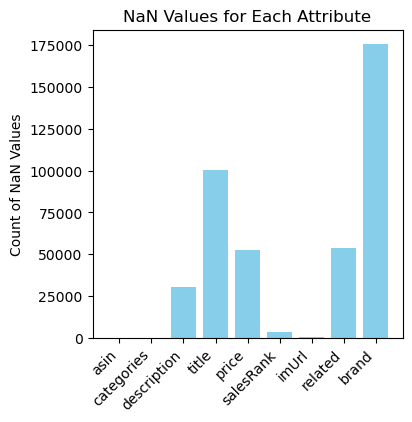

In [3]:
nan_counts = df.isna().sum()
import matplotlib.pyplot as plt
# Count NaN values for each attribute
nan_counts = df.isna().sum()
plt.figure(figsize=(4,4))

plt.bar(nan_counts.index, nan_counts, color='skyblue')
plt.title('NaN Values for Each Attribute')
plt.ylabel('Count of NaN Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

In [4]:
# Flatten the sublists in the 'categories'
df['categories'] = df['categories'].apply(lambda x: [item.strip() for sublist in x for item in sublist])

# Explode the lists in the 'categories' column into separate rows
exploded_data = df.explode('categories')

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(exploded_data['categories']).groupby(level=0).sum()

# Join the one-hot encoded DataFrame with the original DataFrame
result = df.join(one_hot_encoded)

print(result)

              asin             categories  \
0       0000143561  [Movies & TV, Movies]   
1       0000589012  [Movies & TV, Movies]   
2       0000695009  [Movies & TV, Movies]   
3       000107461X  [Movies & TV, Movies]   
4       0000143529  [Movies & TV, Movies]   
...            ...                    ...   
208316  B00LP6VK4I  [Movies & TV, Movies]   
208317  B00LPJ3J6W      [Movies & TV, TV]   
208318  B00LPMOY36  [Movies & TV, Movies]   
208319  B00LT1JHLW      [Movies & TV, TV]   
208320  B00LVGP8EA  [Movies & TV, Movies]   

                                              description  \
0       3Pack DVD set - Italian Classics, Parties and ...   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4       Disc 1: Flour Power (Scones; Shortcakes; South...   
...                                                   ...   
208316  "My people perish for la

In [5]:
#test = result.drop(['categories','description','title','price','salesRank','imUrl','related'], axis =1)

In [6]:
#test = test.drop(['brand'], axis =1)

In [7]:
#test.head()

In [8]:
#result

In [10]:
import numpy as np
extract_sales_rank = lambda x: list(x.values())[0] if isinstance(x, dict) else np.nan
# Applying the function to the 'salesRank' column
result['salesRanks'] = result['salesRank'].apply(extract_sales_rank)



In [11]:
result.head()

,asin,categories,description,title,price,salesRank,imUrl,related,brand,#508510,...,World Music,Wrenches,Wrestling,Writing & Correction Supplies,Xbox,Xbox 360,Yarn Storage,Yoga,Zimbabwe,salesRanks
0,0000143561,"[Movies & TV, Movies]","3Pack DVD set - Italian Classics, Parties and ...","Everyday Italian (with Giada de Laurentiis), V...",12.99,{'Movies & TV': 376041},http://g-ecx.images-amazon.com/images/G/01/x-s...,"{'also_viewed': ['B0036FO6SI', 'B000KL8ODE', '...",NaN,0,...,0,0,0,0,0,0,0,0,0,376041.0
1,0000589012,"[Movies & TV, Movies]",NaN,Why Don't They Just Quit? DVD Roundtable Discu...,15.95,{'Movies & TV': 1084845},http://ecx.images-amazon.com/images/I/519%2B1k...,"{'also_bought': ['B000Z3N1HQ', '0578045427', '...",NaN,0,...,0,0,0,0,0,0,0,0,0,1084845.0
2,0000695009,"[Movies & TV, Movies]",NaN,Understanding Seizures and Epilepsy DVD,NaN,{'Movies & TV': 1022732},http://g-ecx.images-amazon.com/images/G/01/x-s...,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,1022732.0
3,000107461X,"[Movies & TV, Movies]",NaN,Live in Houston [VHS],NaN,{'Movies & TV': 954116},http://ecx.images-amazon.com/images/I/41WY47gL...,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,954116.0
4,0000143529,"[Movies & TV, Movies]",Disc 1: Flour Power (Scones; Shortcakes; South...,My Fair Pastry (Good Eats Vol. 9),19.99,{'Movies & TV': 463562},http://ecx.images-amazon.com/images/I/51QY79CD...,"{'also_bought': ['B000NR4CRM', 'B0019BK3KQ', '...",NaN,0,...,0,0,0,0,0,0,0,0,0,463562.0


In [12]:
import numpy as np
extract_sales_rank = lambda x: list(x.values())[0] if isinstance(x, dict) else np.nan
# Applying the function to the 'salesRank' column
result['salesRanks'] = result['salesRank'].apply(extract_sales_rank)

print(result)

              asin             categories  \
0       0000143561  [Movies & TV, Movies]   
1       0000589012  [Movies & TV, Movies]   
2       0000695009  [Movies & TV, Movies]   
3       000107461X  [Movies & TV, Movies]   
4       0000143529  [Movies & TV, Movies]   
...            ...                    ...   
208316  B00LP6VK4I  [Movies & TV, Movies]   
208317  B00LPJ3J6W      [Movies & TV, TV]   
208318  B00LPMOY36  [Movies & TV, Movies]   
208319  B00LT1JHLW      [Movies & TV, TV]   
208320  B00LVGP8EA  [Movies & TV, Movies]   

                                              description  \
0       3Pack DVD set - Italian Classics, Parties and ...   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4       Disc 1: Flour Power (Scones; Shortcakes; South...   
...                                                   ...   
208316  "My people perish for la

In [13]:
data = result.drop(['categories','salesRank','description','imUrl','brand'], axis=1)


In [14]:
median_price = data['price'].median()
median_sales = data['salesRanks'].median()
# Impute missing prices with the median
data['price'].fillna(median_price, inplace=True)
data['salesRanks'].fillna(median_sales, inplace=True)

In [15]:
# Replace NaN values in 'title' column with 'unknown'
data['title'].fillna('unknown', inplace=True)

# Print the DataFrame to verify the changes
print(data)


              asin                                              title   price  \
0       0000143561  Everyday Italian (with Giada de Laurentiis), V...   12.99   
1       0000589012  Why Don't They Just Quit? DVD Roundtable Discu...   15.95   
2       0000695009            Understanding Seizures and Epilepsy DVD   17.46   
3       000107461X                              Live in Houston [VHS]   17.46   
4       0000143529                  My Fair Pastry (Good Eats Vol. 9)   19.99   
...            ...                                                ...     ...   
208316  B00LP6VK4I                                            unknown   17.46   
208317  B00LPJ3J6W                                            unknown   39.98   
208318  B00LPMOY36                                            unknown   17.46   
208319  B00LT1JHLW                                            unknown  269.97   
208320  B00LVGP8EA                                            unknown   44.82   

                           

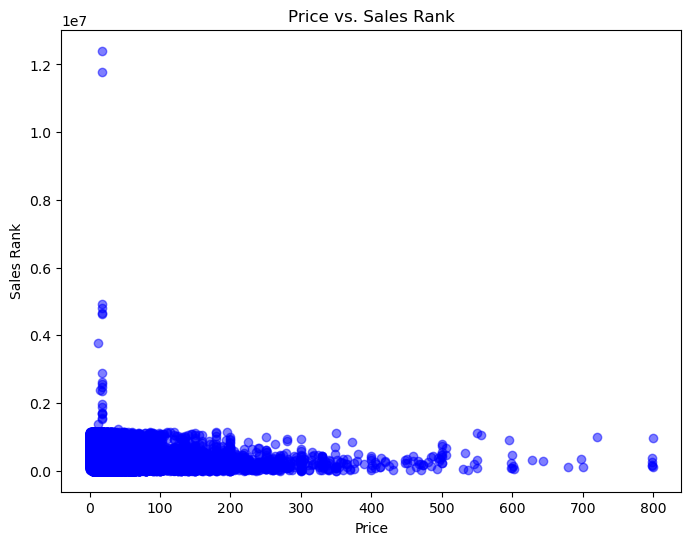

In [18]:
plt.figure(figsize=(8, 6))

plt.scatter(data['price'], data['salesRanks'], color='blue', alpha=0.5)
plt.title('Price vs. Sales Rank')
plt.xlabel('Price')
plt.ylabel('Sales Rank')

plt.show()

In [19]:
# Convert NaN values to empty dictionaries
data['related'].fillna({}, inplace=True)

# Extract IDs of related items
data['related_also_viewed'] = data['related'].apply(lambda x: x.get('also_viewed', []) if isinstance(x, dict) else [])
data['related_also_bought'] = data['related'].apply(lambda x: x.get('also_bought', []) if isinstance(x, dict) else [])
data['related_bought_together'] = data['related'].apply(lambda x: x.get('bought_together', []) if isinstance(x, dict) else [])
data['related_buy_after_viewing'] = data['related'].apply(lambda x: x.get('buy_after_viewing', []) if isinstance(x, dict) else [])

# Drop the original 'related' column
data.drop('related', axis=1, inplace=True)


In [20]:
# Check for NaN values in each column
nan_columns = data.isna().any()

# Print columns with NaN values
print("Columns with NaN values:")
print(nan_columns[nan_columns].index.tolist())


Columns with NaN values:
[]


In [21]:
# Count the number of related items for each item
data['num_related_also_viewed'] = data['related_also_viewed'].apply(len)
data['num_related_also_bought'] = data['related_also_bought'].apply(len)
data['num_related_bought_together'] = data['related_bought_together'].apply(len)
data['num_related_buy_after_viewing'] = data['related_buy_after_viewing'].apply(len)

# Optionally, you can sum up the counts across different related item types
data['total_num_related'] = (data['num_related_also_viewed'] +
                             data['num_related_also_bought'] +
                             data['num_related_bought_together'] +
                             data['num_related_buy_after_viewing'])

# Drop the original lists of related items
data.drop(['related_also_viewed', 'related_also_bought', 'related_bought_together', 'related_buy_after_viewing'], axis=1, inplace=True)


In [22]:
data.head()

,asin,title,price,#508510,Accessories,Accessories & Supplies,Accordions,Acid Jazz,Acoustic Blues,Acoustic Guitars,...,Xbox 360,Yarn Storage,Yoga,Zimbabwe,salesRanks,num_related_also_viewed,num_related_also_bought,num_related_bought_together,num_related_buy_after_viewing,total_num_related
0,0000143561,"Everyday Italian (with Giada de Laurentiis), V...",12.99,0,0,0,0,0,0,0,...,0,0,0,0,376041.0,6,0,0,4,10
1,0000589012,Why Don't They Just Quit? DVD Roundtable Discu...,15.95,0,0,0,0,0,0,0,...,0,0,0,0,1084845.0,0,100,0,4,104
2,0000695009,Understanding Seizures and Epilepsy DVD,17.46,0,0,0,0,0,0,0,...,0,0,0,0,1022732.0,0,0,0,0,0
3,000107461X,Live in Houston [VHS],17.46,0,0,0,0,0,0,0,...,0,0,0,0,954116.0,0,0,0,0,0
4,0000143529,My Fair Pastry (Good Eats Vol. 9),19.99,0,0,0,0,0,0,0,...,0,0,0,0,463562.0,0,13,0,4,17


In [23]:
'''
ranges = data.agg({'asin': ['min', 'max'], 
                      'title': ['min', 'max'], 
                      'price': ['min', 'max'], 
                      'salesRanks': ['min', 'max']})
print(ranges)
'''

"\nranges = data.agg({'asin': ['min', 'max'], \n                      'title': ['min', 'max'], \n                      'price': ['min', 'max'], \n                      'salesRanks': ['min', 'max']})\nprint(ranges)\n"

In [24]:
# Assuming 'price' and 'salesRanks' are columns in your DataFrame
min_price = data['price'].min()
max_price = data['price'].max()
min_sales_rank = data['salesRanks'].min()
max_sales_rank = data['salesRanks'].max()

# Min-Max Normalization for price
data['normalized_price'] = (data['price'] - min_price) / (max_price - min_price)

# Min-Max Normalization for salesRanks
data['normalized_salesRank'] = (data['salesRanks'] - min_sales_rank) / (max_sales_rank - min_sales_rank)


In [25]:
data = data.drop(['price','salesRanks'], axis =1)

In [26]:
data.head()

,asin,title,#508510,Accessories,Accessories & Supplies,Accordions,Acid Jazz,Acoustic Blues,Acoustic Guitars,Acoustic-Electric Guitars,...,Yarn Storage,Yoga,Zimbabwe,num_related_also_viewed,num_related_also_bought,num_related_bought_together,num_related_buy_after_viewing,total_num_related,normalized_price,normalized_salesRank
0,0000143561,"Everyday Italian (with Giada de Laurentiis), V...",0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,4,10,0.016225,0.030315
1,0000589012,Why Don't They Just Quit? DVD Roundtable Discu...,0,0,0,0,0,0,0,0,...,0,0,0,0,100,0,4,104,0.019925,0.087459
2,0000695009,Understanding Seizures and Epilepsy DVD,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.021813,0.082451
3,000107461X,Live in Houston [VHS],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.021813,0.076919
4,0000143529,My Fair Pastry (Good Eats Vol. 9),0,0,0,0,0,0,0,0,...,0,0,0,0,13,0,4,17,0.024976,0.037371


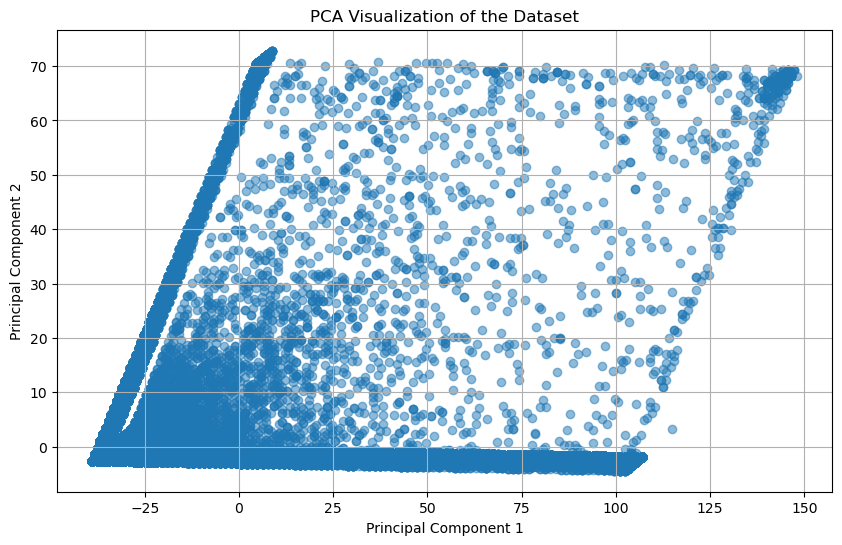

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



# Select numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64'])

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(numerical_columns)

# Plot PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of the Dataset')
plt.grid(True)
plt.show()


In [27]:

# Save DataFrame to CSV file
data.to_csv('pretrained_meta_data.csv', index=False)
